# Strutting the Red Carpet: A Movie Analysis.
---

### by Adriana Galindo, Mostafa Tabatabai & William Walker

- This code takes movie data from a csv file created by Kraggle.com®
 

In [64]:
#### IMPORT Everything here ####
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import ast
import re
import json

# Cleaning the Data

 

In [65]:
#### Read 'movies_metadata.csv' and display it as a DataFrame ####
movie_metadata_path = "Resources/movies_metadata.csv"
movie_metadata = pd.read_csv(movie_metadata_path, low_memory = False)
movie_metadata.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [66]:
#### Get rid of unnecessary columns like 'original_language', 'homepage', etc. ####
movie_metadata_df =  movie_metadata[[
    "title", "imdb_id", "genres", "release_date", "budget", "revenue",
    "runtime", "vote_average", "vote_count", "production_companies"
]]

#### We only want movies between 2007 and 2017. ####
movie_metadata_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :
                                            ]

#### Choose movies that had a budget and box office of more than $100,000. ####
movie_metadata_df = movie_metadata_df.loc[
    (movie_metadata_df["budget"] >= "100000") & (movie_metadata_df["revenue"] >= 100000.0), :
                                            ]


#?#?# This CSV made the data type of budget and runtime into strings, so yay. #?#?#?#
                                        #### (•_•) ####
#### Convert all wanted numerical values, except release_date, into float ####
movie_metadata_df["budget"] = movie_metadata_df["budget"].astype(float)
movie_metadata_df["revenue"] = movie_metadata_df["revenue"].astype(float)
movie_metadata_df["runtime"] = movie_metadata_df["runtime"].astype(float)

#### First 10 in our DataFrame ####
movie_metadata_df.head(10)

,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies
4356,Camille Claudel 1915,tt2018086,"[{'id': 18, 'name': 'Drama'}]",2013-03-13,3512454.0,115860.0,95.0,7.0,20.0,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art..."
11155,Black Gold,tt1701210,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2011-12-21,40000000.0,5446000.0,130.0,5.9,77.0,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name..."
11472,Freedom Writers,tt0463998,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2007-01-05,21000000.0,41170784.0,123.0,7.6,368.0,"[{'name': 'Double Feature Films', 'id': 215}, ..."
11497,Code Name: The Cleaner,tt0462229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2007-01-05,20000000.0,10337477.0,84.0,4.7,78.0,"[{'name': 'New Line Cinema', 'id': 12}]"
11498,Stomp the Yard,tt0775539,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",2007-05-16,13000000.0,75511123.0,114.0,6.1,90.0,"[{'name': 'Rainforest Films', 'id': 1309}]"
11521,The Hitcher,tt0455960,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2007-01-19,10000000.0,25399945.0,84.0,5.6,253.0,"[{'name': 'Intrepid Pictures', 'id': 1224}, {'..."
11537,Bridge to Terabithia,tt0398808,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2007-02-16,60000000.0,137587063.0,96.0,7.0,1146.0,"[{'name': 'Walden Media', 'id': 10221}, {'name..."
11547,Waitress,tt0473308,"[{'id': 35, 'name': 'Comedy'}]",2007-05-25,2000000.0,22179430.0,108.0,6.6,132.0,"[{'name': 'Night and Day Pictures', 'id': 24133}]"
11557,Epic Movie,tt0799949,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2007-01-25,20000000.0,86865564.0,86.0,3.2,334.0,[{'name': 'Twentieth Century Fox Film Corporat...
11558,The Messengers,tt0425430,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",2007-02-02,16000000.0,1109660.0,90.0,5.6,216.0,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."


In [67]:
#### How many Movies are we looking at? ####
print(f"The movie database contains {len(movie_metadata_df)} movies that match our criteria.")


The movie database contains 2148 movies that match our criteria.


# Question 1: What were the top ten profitable movies of each year?  

 

In [68]:
#### Separate movies by release year. ####
### Note that the roman numerals denote the 'yy' year of data. ###

moviesVII_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2007-12-31"), :]

moviesVIII_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2008-01-01") & (movie_metadata_df["release_date"] <= "2008-12-31"), :]

moviesIX_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2009-01-01") & (movie_metadata_df["release_date"] <= "2009-12-31"), :]

moviesX_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2010-01-01") & (movie_metadata_df["release_date"] <= "2010-12-31"), :]

moviesXI_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2011-01-01") & (movie_metadata_df["release_date"] <= "2011-12-31"), :]

moviesXII_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2012-01-01") & (movie_metadata_df["release_date"] <= "2012-12-31"), :]

moviesXIII_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2013-01-01") & (movie_metadata_df["release_date"] <= "2013-12-31"), :]

moviesXIV_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2014-01-01") & (movie_metadata_df["release_date"] <= "2014-12-31"), :]

moviesXV_df = movie_metadata_df.loc[ 
    (movie_metadata_df["release_date"] >= "2015-01-01") & (movie_metadata_df["release_date"] <= "2015-12-31"), :]

moviesXVI_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2016-01-01") & (movie_metadata_df["release_date"] <= "2016-12-31"), :]

moviesXVII_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2017-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :]


In [69]:
# Calculate the net profit by subtracting the budget from the revenue
movie_metadata_df["net_profit"] = movie_metadata_df["revenue"] - movie_metadata_df["budget"]

# Exclude movies with 0 revenue and non-numeric values in "revenue" and "budget" columns
movie_meta_df = movie_metadata_df.dropna(subset=["revenue", "budget"], how="any")
movie_meta_df = movie_meta_df[movie_meta_df["revenue"] != 0]

# Sort the DataFrame by net profit in descending order
movie_meta_df = movie_meta_df.sort_values(by="net_profit", ascending=False)

# Display the first 20 rows of the updated movie_metadata_df DataFrame
print(movie_meta_df.head(20))

                                              title    imdb_id  \
14551                                        Avatar  tt0499549   
26555                  Star Wars: The Force Awakens  tt2488496   
25084                                Jurassic World  tt0369610   
28830                                     Furious 7  tt2820852   
17818                                  The Avengers  tt0848228   
17437  Harry Potter and the Deathly Hallows: Part 2  tt1201607   
26558                       Avengers: Age of Ultron  tt2395427   
22110                                        Frozen  tt2294629   
42222                          Beauty and the Beast  tt2771200   
30700                                       Minions  tt2293640   
20830                                    Iron Man 3  tt1300854   
43255                       The Fate of the Furious  tt4630562   
44009                               Despicable Me 3  tt3469046   
17293                Transformers: Dark of the Moon  tt1399103   
19261     

In [70]:
pd.options.display.float_format = "{:,}".format

In [71]:
movie_meta_df.sort_values(by="net_profit", ascending=False)

,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,net_profit
14551,Avatar,tt0499549,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2009-12-10,"237,000,000.0","2,787,965,087.0",162.0,7.2,"12,114.0","[{'name': 'Ingenious Film Partners', 'id': 289...","2,550,965,087.0"
26555,Star Wars: The Force Awakens,tt2488496,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-12-15,"245,000,000.0","2,068,223,624.0",136.0,7.5,"7,993.0","[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","1,823,223,624.0"
25084,Jurassic World,tt0369610,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-06-09,"150,000,000.0","1,513,528,810.0",124.0,6.5,"8,842.0","[{'name': 'Universal Studios', 'id': 13}, {'na...","1,363,528,810.0"
28830,Furious 7,tt2820852,"[{'id': 28, 'name': 'Action'}]",2015-04-01,"190,000,000.0","1,506,249,360.0",137.0,7.3,"4,253.0","[{'name': 'Universal Pictures', 'id': 33}, {'n...","1,316,249,360.0"
17818,The Avengers,tt0848228,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2012-04-25,"220,000,000.0","1,519,557,910.0",143.0,7.4,"12,000.0","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","1,299,557,910.0"
...,...,...,...,...,...,...,...,...,...,...,...
13128,Australia,tt0455824,"[{'id': 18, 'name': 'Drama'}]",2008-11-18,"130,000,000.0","49,554,002.0",165.0,6.3,712.0,"[{'name': 'Bazmark Films', 'id': 240}, {'name'...","-80,445,998.0"
41491,Live by Night,tt2361317,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2016-12-25,"108,000,000.0","22,678,555.0",129.0,6.2,416.0,"[{'name': 'Appian Way', 'id': 562}, {'name': '...","-85,321,445.0"
44337,Valerian and the City of a Thousand Planets,tt2239822,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",2017-07-20,"197,471,676.0","90,024,292.0",137.0,6.7,905.0,"[{'name': 'EuropaCorp', 'id': 6896}]","-107,447,384.0"
16788,Mars Needs Moms,tt1305591,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",2011-03-09,"150,000,000.0","38,992,758.0",88.0,5.6,202.0,"[{'name': 'Walt Disney Animation Studios', 'id...","-111,007,242.0"


In [73]:
# Get the top ten net profit movies
top_ten_net_profit_movies = movie_meta_df.head(10)

# Display the top ten net profit movies
print(top_ten_net_profit_movies)

                                              title    imdb_id  \
14551                                        Avatar  tt0499549   
26555                  Star Wars: The Force Awakens  tt2488496   
25084                                Jurassic World  tt0369610   
28830                                     Furious 7  tt2820852   
17818                                  The Avengers  tt0848228   
17437  Harry Potter and the Deathly Hallows: Part 2  tt1201607   
26558                       Avengers: Age of Ultron  tt2395427   
22110                                        Frozen  tt2294629   
42222                          Beauty and the Beast  tt2771200   
30700                                       Minions  tt2293640   

                                                  genres release_date  \
14551  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2009-12-10   
26555  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2015-12-15   
25084  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam.

In [74]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_meta_df["release_date"] = pd.to_datetime(movie_meta_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_meta_df["release_year"] = movie_meta_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_meta_df = movie_meta_df[(movie_meta_df["release_year"] >= 2007) & (movie_meta_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_meta_df = movie_meta_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the top ten movies for each year
top_ten_movies_by_year = movie_meta_df.groupby("release_year").head(10)

# Display the top ten movies of each year and their net profit
for year, group in top_ten_movies_by_year.groupby("release_year"):
    print(f"\nTop 10 Movies of {year}:")
    print(group[["title", "net_profit"]].head(10))


Top 10 Movies of 2007:
                                           title    net_profit
11927  Harry Potter and the Order of the Phoenix 788,212,738.0
11827   Pirates of the Caribbean: At World's End 661,000,000.0
11825                            Shrek the Third 638,958,165.0
11780                               Spider-Man 3 632,871,626.0
11925                               Transformers 559,709,780.0
11567                                Ratatouille 473,722,818.0
11959                         The Simpsons Movie 452,068,851.0
12217                                I Am Legend 435,349,010.0
11965                       The Bourne Ultimatum 372,824,138.0
12278         National Treasure: Book of Secrets 327,363,168.0

Top 10 Movies of 2008:
                                                   title    net_profit
12481                                    The Dark Knight 819,558,444.0
12625  Indiana Jones and the Kingdom of the Crystal S... 601,636,033.0
12768                                         

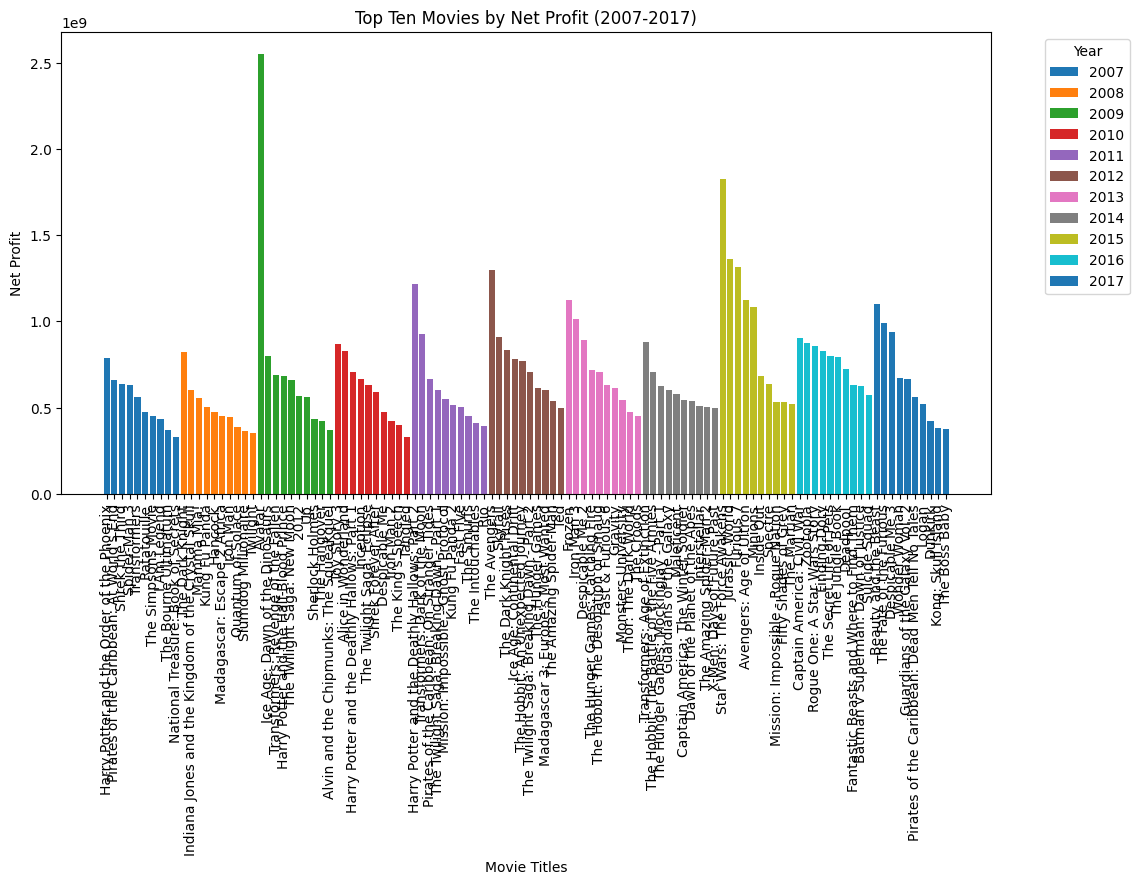

In [75]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_meta_df["release_date"] = pd.to_datetime(movie_meta_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_metadata_df["release_year"] = movie_meta_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_meta_df = movie_meta_df[(movie_meta_df["release_year"] >= 2007) & (movie_meta_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_meta_df = movie_meta_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the top ten movies for each year
top_ten_movies_by_year = movie_meta_df.groupby("release_year").head(10)

# Create a bar graph for the top ten movies of each year and their net profit
plt.figure(figsize=(12, 6))
for year, group in top_ten_movies_by_year.groupby("release_year"):
    plt.bar(group["title"], group["net_profit"], label=str(year))

plt.xticks(rotation=90)
plt.xlabel("Movie Titles")
plt.ylabel("Net Profit")
plt.title("Top Ten Movies by Net Profit (2007-2017)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

In [76]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_meta_df["release_date"] = pd.to_datetime(movie_meta_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_meta_df["release_year"] = movie_meta_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_meta_df = movie_meta_df[(movie_meta_df["release_year"] >= 2007) & (movie_meta_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_meta_df = movie_meta_df.sort_values(by="net_profit", ascending=False)

# Create an empty dictionary to store the top ten movies of each year by genre
top_ten_movies_by_genre = {}

# Group the DataFrame by release_year and extract the top ten movies for each year
grouped_by_year = movie_meta_df.groupby("release_year")
for year, group in grouped_by_year:
    top_ten_movies_by_genre[year] = group.head(10)["title"].tolist()

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(top_ten_movies_by_genre, orient='index')

# Transpose the DataFrame to have genres as columns and years as rows
df = df.transpose()

# Display the DataFrame with top ten movies organized by genre
print(df)

                                        2007  \
0  Harry Potter and the Order of the Phoenix   
1   Pirates of the Caribbean: At World's End   
2                            Shrek the Third   
3                               Spider-Man 3   
4                               Transformers   
5                                Ratatouille   
6                         The Simpsons Movie   
7                                I Am Legend   
8                       The Bourne Ultimatum   
9         National Treasure: Book of Secrets   

                                                2008  \
0                                    The Dark Knight   
1  Indiana Jones and the Kingdom of the Crystal S...   
2                                         Mamma Mia!   
3                                      Kung Fu Panda   
4                                            Hancock   
5                        Madagascar: Escape 2 Africa   
6                                           Iron Man   
7                      

# Question 2: Which movies made the most money in the years 2007 to 2017?

 

In [82]:
movie_meta_df.head(10)

,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,net_profit,release_year
14551,Avatar,tt0499549,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2009-12-10,"237,000,000.0","2,787,965,087.0",162.0,7.2,"12,114.0","[{'name': 'Ingenious Film Partners', 'id': 289...","2,550,965,087.0",2009
26555,Star Wars: The Force Awakens,tt2488496,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-12-15,"245,000,000.0","2,068,223,624.0",136.0,7.5,"7,993.0","[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","1,823,223,624.0",2015
25084,Jurassic World,tt0369610,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-06-09,"150,000,000.0","1,513,528,810.0",124.0,6.5,"8,842.0","[{'name': 'Universal Studios', 'id': 13}, {'na...","1,363,528,810.0",2015
28830,Furious 7,tt2820852,"[{'id': 28, 'name': 'Action'}]",2015-04-01,"190,000,000.0","1,506,249,360.0",137.0,7.3,"4,253.0","[{'name': 'Universal Pictures', 'id': 33}, {'n...","1,316,249,360.0",2015
17818,The Avengers,tt0848228,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2012-04-25,"220,000,000.0","1,519,557,910.0",143.0,7.4,"12,000.0","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","1,299,557,910.0",2012
17437,Harry Potter and the Deathly Hallows: Part 2,tt1201607,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",2011-07-07,"125,000,000.0","1,342,000,000.0",130.0,7.9,"6,141.0","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","1,217,000,000.0",2011
26558,Avengers: Age of Ultron,tt2395427,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-04-22,"280,000,000.0","1,405,403,694.0",141.0,7.3,"6,908.0","[{'name': 'Marvel Studios', 'id': 420}, {'name...","1,125,403,694.0",2015
22110,Frozen,tt2294629,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",2013-11-27,"150,000,000.0","1,274,219,009.0",102.0,7.3,"5,440.0","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","1,124,219,009.0",2013
42222,Beauty and the Beast,tt2771200,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",2017-03-16,"160,000,000.0","1,262,886,337.0",129.0,6.8,"5,530.0","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","1,102,886,337.0",2017
30700,Minions,tt2293640,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2015-06-17,"74,000,000.0","1,156,730,962.0",91.0,6.4,"4,729.0","[{'name': 'Universal Pictures', 'id': 33}, {'n...","1,082,730,962.0",2015


# Question 3: What is the correlation between a movie's budget and its profitability?

 

<Axes: title={'center': 'Movie Revenue vs Movie Budget'}, xlabel='Movie Budget ($ Millions)', ylabel='Movie Revenue ($ Billions)'>

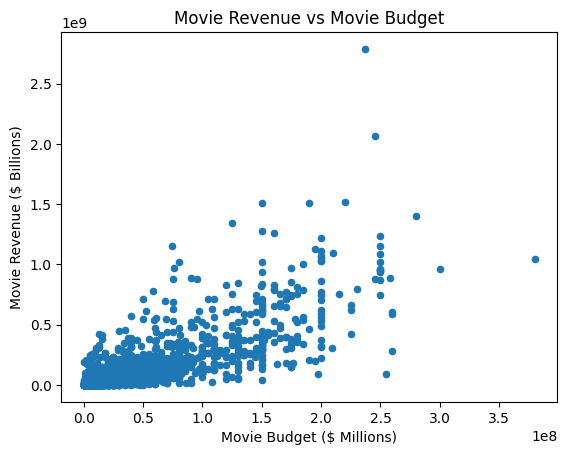

In [27]:
#### Graph movie revenue vs budget using a scatterplot. ####
movie_metadata_df.plot.scatter(
    "budget","revenue", title = "Movie Revenue vs Movie Budget",
    xlabel = "Movie Budget ($ Millions)", ylabel = "Movie Revenue ($ Billions)",
                                )


<Axes: title={'center': 'Logarithmic Plot of Movie Budget vs Movie Revenue'}, xlabel='Movie Budget ($)', ylabel='Movie Revenue ($)'>

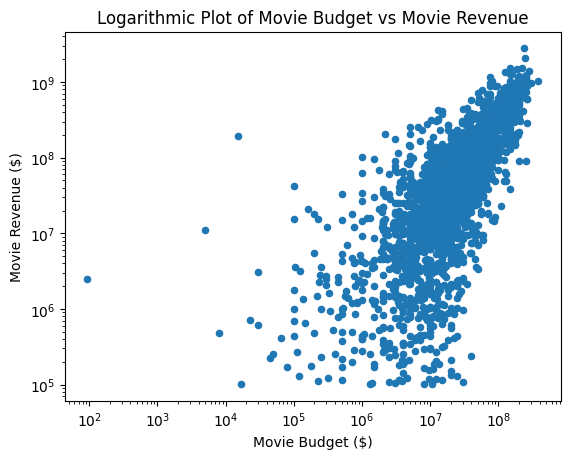

In [28]:
#### log graph ####
movie_metadata_df.plot.scatter(
    "budget","revenue",
    title = "Logarithmic Plot of Movie Budget vs Movie Revenue",
    logx = True, logy = True,
    xlabel = "Movie Budget ($)", ylabel = "Movie Revenue ($)"
                              )


In [48]:
#### Find the Pearson Correlation Coefficient (r) ####

bud_revCORR = np.corrcoef(movie_metadata_df["budget"], movie_metadata_df["revenue"])

bud_revNum = float(round(bud_revCORR[0, 1], 2)) 

print(f"""Between movie budget and movie revenue, the correlation coefficient is {bud_revNum}, 
      meaning that a movie's budget and revenue are strongly correlated.""")

Between movie budget and movie revenue, the correlation coefficient is 0.78, 
      meaning that a movie's budget and revenue are strongly correlated.


# Question 4: What's the correlation between a movie's production company  and its popularity?

 

In [56]:
# Cleaning Data
movie_df =  movie_metadata[
    ["title", "imdb_id", "genres", "release_date", "budget",
     "revenue", "runtime", "vote_average", "vote_count",
     "production_companies","popularity"]
                                    ]

# Custom function to extract company names from JSON strings
def extract_and_join_company_names(json_str):
    if pd.notnull(json_str):
        names = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(names)  # Join the company names into a single string separated by ', '
    else:
        return "Unknown"
    
# Apply the custom function to the 'production_companies' column
movie_df.loc[:, "production_companies"] = movie_df["production_companies"].apply(
    lambda x: extract_and_join_company_names(x)
                                                )


# Custom function to extract and join genre names from JSON strings
def extract_and_join_genre_names(json_str):
    if pd.notnull(json_str):
        genres = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(genres)  # Join the genre names into a single string separated by ', '
    else:
        return "Unknown"  # Return "Unknown" if the JSON string is empty or NaN

# Use .apply with a lambda function and .loc for the assignment
movie_df.loc[:, "genres"] = movie_df["genres"].apply(lambda x: extract_and_join_genre_names(x))


movie_df.head(10)

,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,popularity
0,Toy Story,tt0114709,"Animation, Comedy, Family",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,21.946943
1,Jumanji,tt0113497,"Adventure, Fantasy, Family",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0,"TriStar Pictures, Teitler Film, Interscope Com...",17.015539
2,Grumpier Old Men,tt0113228,"Romance, Comedy",1995-12-22,0,0.0,101.0,6.5,92.0,"Warner Bros., Lancaster Gate",11.7129
3,Waiting to Exhale,tt0114885,"Comedy, Drama, Romance",1995-12-22,16000000,81452156.0,127.0,6.1,34.0,Twentieth Century Fox Film Corporation,3.859495
4,Father of the Bride Part II,tt0113041,Comedy,1995-02-10,0,76578911.0,106.0,5.7,173.0,"Sandollar Productions, Touchstone Pictures",8.387519
5,Heat,tt0113277,"Action, Crime, Drama, Thriller",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0,"Regency Enterprises, Forward Pass, Warner Bros.",17.924927
6,Sabrina,tt0114319,"Comedy, Romance",1995-12-15,58000000,0.0,127.0,6.2,141.0,"Paramount Pictures, Scott Rudin Productions, M...",6.677277
7,Tom and Huck,tt0112302,"Action, Adventure, Drama, Family",1995-12-22,0,0.0,97.0,5.4,45.0,Walt Disney Pictures,2.561161
8,Sudden Death,tt0114576,"Action, Adventure, Thriller",1995-12-22,35000000,64350171.0,106.0,5.5,174.0,"Universal Pictures, Imperial Entertainment, Si...",5.23158
9,GoldenEye,tt0113189,"Adventure, Action, Thriller",1995-11-16,58000000,352194034.0,130.0,6.6,1194.0,"United Artists, Eon Productions",14.686036


In [57]:
# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_df.explode('production_companies')

# Group the DataFrame by production companies and count the number of movies produced by each company
company_movie_count = exploded_df.groupby('production_companies')['title'].count()

# Sort the results in descending order
company_movie_count = company_movie_count.sort_values(ascending=False)


company_movie_count_df = company_movie_count.reset_index(name='movie_count')
print(company_movie_count_df.head(11))

                      production_companies  movie_count
0                                                 11933
1                Metro-Goldwyn-Mayer (MGM)          772
2                             Warner Bros.          540
3                       Paramount Pictures          505
4   Twentieth Century Fox Film Corporation          441
5                       Universal Pictures          322
6                       RKO Radio Pictures          247
7            Columbia Pictures Corporation          207
8                        Columbia Pictures          147
9                                  Mosfilm          145
10                    Walt Disney Pictures           85


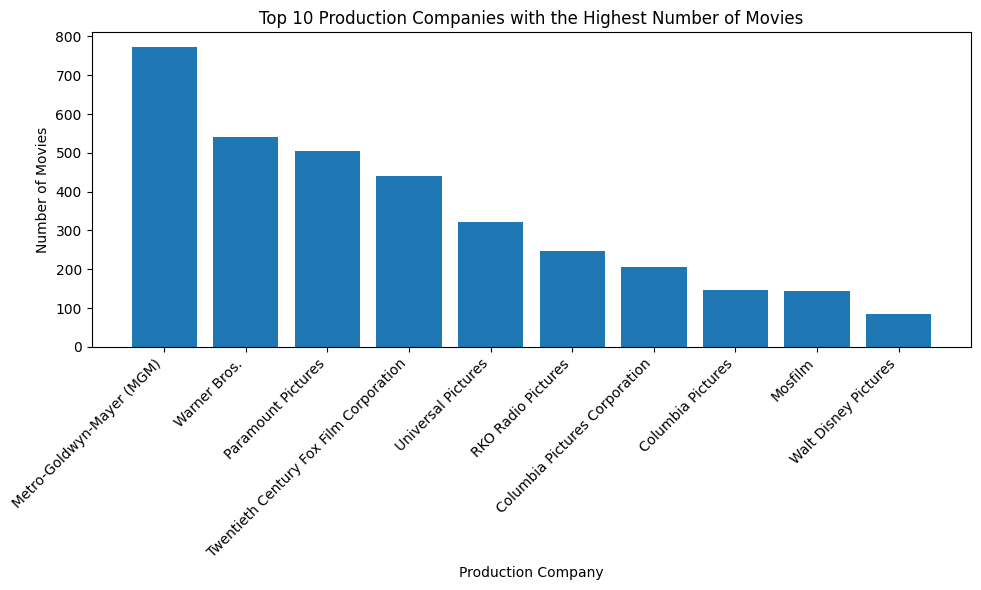

In [58]:
# Filter out rows where 'production_companies' are empty
filtered_df = company_movie_count_df[company_movie_count_df['production_companies'] != '']

#Visualization
top_10_companies = filtered_df.head(10)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['production_companies'], top_10_companies['movie_count'])
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.title('Top 10 Production Companies with the Highest Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# Clean the 'popularity' column and convert it to numeric using .loc
movie_df.loc[:, 'popularity'] = pd.to_numeric(movie_df['popularity'], errors='coerce')

# Drop rows with no values from the 'popularity' column
movie_df = movie_df.dropna(subset=['popularity'])

# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the sum of popularity scores
company_popularity_sum = exploded_df.groupby('production_companies')['popularity'].sum()

# Editing
company_popularity_sum = company_popularity_sum.sort_values(ascending=False)
company_popularity_sum_df = company_popularity_sum.reset_index(name='popularity_sum')
print(company_popularity_sum_df.head(11))


                              production_companies popularity_sum
0                                                    10434.810466
1                               Paramount Pictures    1808.607839
2                        Metro-Goldwyn-Mayer (MGM)     1365.35772
3                                     Warner Bros.    1329.709752
4                               Universal Pictures    1319.880924
5           Twentieth Century Fox Film Corporation    1156.516961
6                                Columbia Pictures     639.474065
7   Universal Pictures, Illumination Entertainment     621.800831
8                             Walt Disney Pictures     596.749623
9                                  New Line Cinema     506.828373
10                   Columbia Pictures Corporation     430.632202


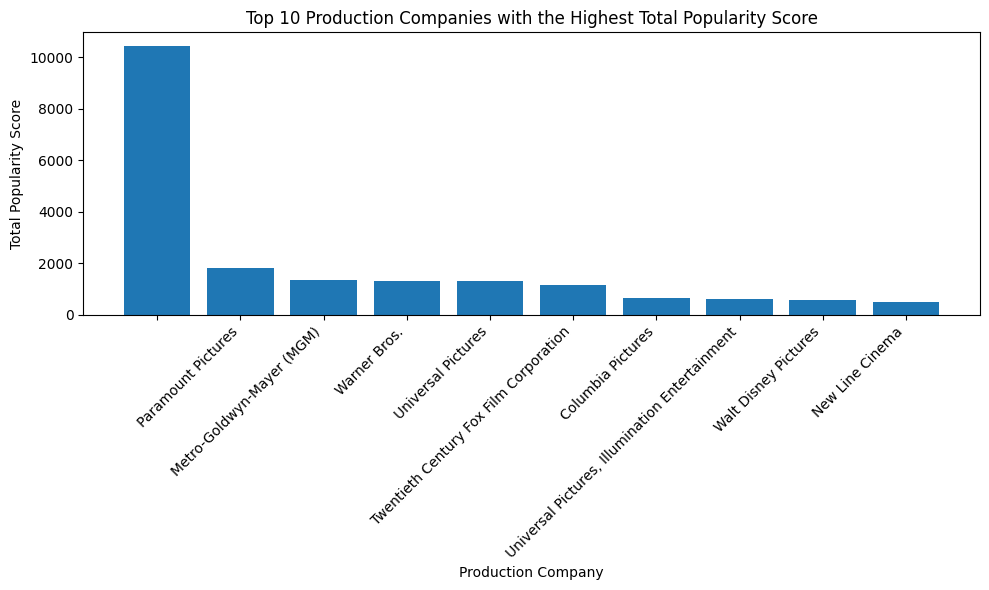

In [60]:
# Visualization
top_n_companies = 10
top_companies = company_popularity_sum.head(top_n_companies)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_companies.index, top_companies.values)
plt.xlabel('Production Company')
plt.ylabel('Total Popularity Score')
plt.title(f'Top {top_n_companies} Production Companies with the Highest Total Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
# Clean the 'popularity' column and convert it to numeric
movie_df['popularity'] = pd.to_numeric(movie_df['popularity'], errors='coerce')

# Drop rows with NaN values in the 'popularity' column
movie_df.dropna(subset=['popularity'], inplace=True)

# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the average of popularity scores
company_popularity_avg = exploded_df.groupby('production_companies')['popularity'].mean()

# Editing
company_popularity_avg = company_popularity_avg.sort_values(ascending=False)
company_popularity_avg = company_popularity_avg.reset_index(name='popularity_avg')
print(company_popularity_avg.head(11))

                                 production_companies  popularity_avg
0   Dune Entertainment, Atlas Entertainment, Warne...      294.337037
1   Big Talk Productions, TriStar Pictures, Media ...      228.032744
2   Twentieth Century Fox Film Corporation, Marvel...      187.860492
3   Ingenious Film Partners, Twentieth Century Fox...      185.070892
4   Summit Entertainment, Warner Bros., 87Eleven, ...      183.870374
5   Twentieth Century Fox Film Corporation, Regenc...      154.801009
6              Walt Disney Pictures, Mandeville Films      148.406669
7                               Chernin Entertainment      146.161786
8   Studio Babelsberg, Marvel Studios, Walt Disney...      145.882135
9           Miramax Films, A Band Apart, Jersey Films      140.950236
10  Walt Disney Pictures, Jerry Bruckheimer Films,...      133.827820


In [62]:
# Visualization
top_n_companies = 10
top_companies = filtered_popularity_avg_df.head(top_n_companies)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_companies['production_companies'], top_companies['popularity_avg'])
plt.xlabel('Production Company')
plt.ylabel('Average Popularity Score')
plt.title(f'Top {top_n_companies} Production Companies with the Highest Average Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'filtered_popularity_avg_df' is not defined

# Question 5: What percentage did each years top movie take of the total revenue of the top ten movies over the ten-year period 2007-2017?

 

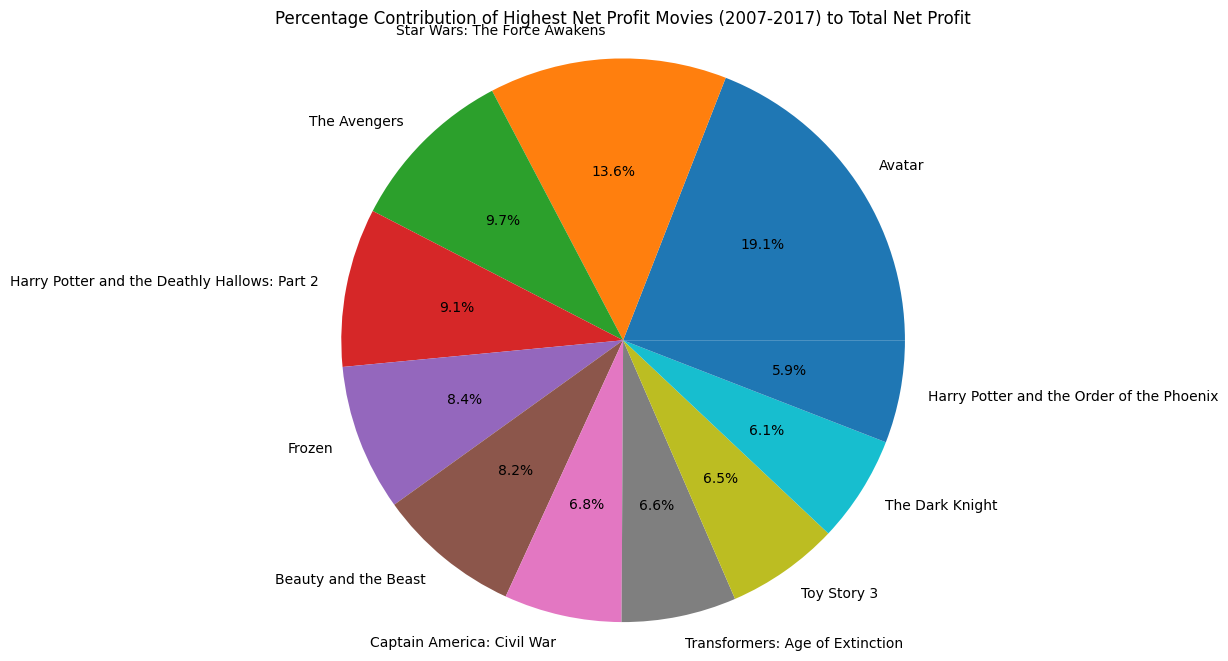

In [81]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_meta_df["release_date"] = pd.to_datetime(movie_meta_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_meta_df["release_year"] = movie_meta_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_meta_df = movie_meta_df[(movie_meta_df["release_year"] >= 2007) & (movie_meta_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_meta_df = movie_meta_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the highest net profit movie for each year
highest_net_profit_movies_by_year = movie_meta_df.groupby("release_year").head(1)

# Calculate the total net profit for the last ten years
total_net_profit_last_ten_years = highest_net_profit_movies_by_year["net_profit"].sum()

# Calculate the percentage contribution of each highest net profit movie to the total net profit
percentage_contributions = (highest_net_profit_movies_by_year["net_profit"] / total_net_profit_last_ten_years) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_contributions, labels=highest_net_profit_movies_by_year["title"], autopct="%1.1f%%")
plt.title("Percentage Contribution of Highest Net Profit Movies (2007-2017) to Total Net Profit")
plt.axis("equal")
plt.show()